In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
udcp = pd.read_csv('gedevents-2024-12-07.csv', index_col=False)
# print(len(udcp), " Observations")
# print(udcp.columns)

7374  Observations
Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best_est',
       'high_est', 'low_est'],
      dtype='object')


In [57]:
myanmar21 = udcp[udcp['year'] >= 2021]

In [58]:
len(myanmar21)

4488

In [66]:
columns_to_keep = ['id', 'year', 'best_est', 'date_start', 'date_end']

# Ensure only existing columns are selected
existing_columns = [col for col in columns_to_keep if col in myanmar21.columns]

# Create a new DataFrame with only the selected columns
bed = myanmar21[existing_columns]

In [67]:
bed.head()

,id,year,best_est,date_start,date_end
0,487940,2023,3,08/21/2023 00:00:00,09/03/2023 00:00:00
8,391053,2021,1,03/25/2021 00:00:00,03/25/2021 00:00:00
9,391054,2021,4,03/25/2021 00:00:00,03/25/2021 00:00:00
10,391057,2021,6,03/26/2021 00:00:00,03/26/2021 00:00:00
11,391059,2021,4,03/27/2021 00:00:00,03/27/2021 00:00:00


In [69]:
bed = bed.copy()

bed['date_start'] = pd.to_datetime(bed['date_start'])
bed['month_year'] = bed['date_start'].dt.to_period('M')

In [77]:
monthly_sum = bed.groupby('month_year')['best_est'].sum().reset_index()
monthly_sum['month_year'] = monthly_sum['month_year'].astype(str)

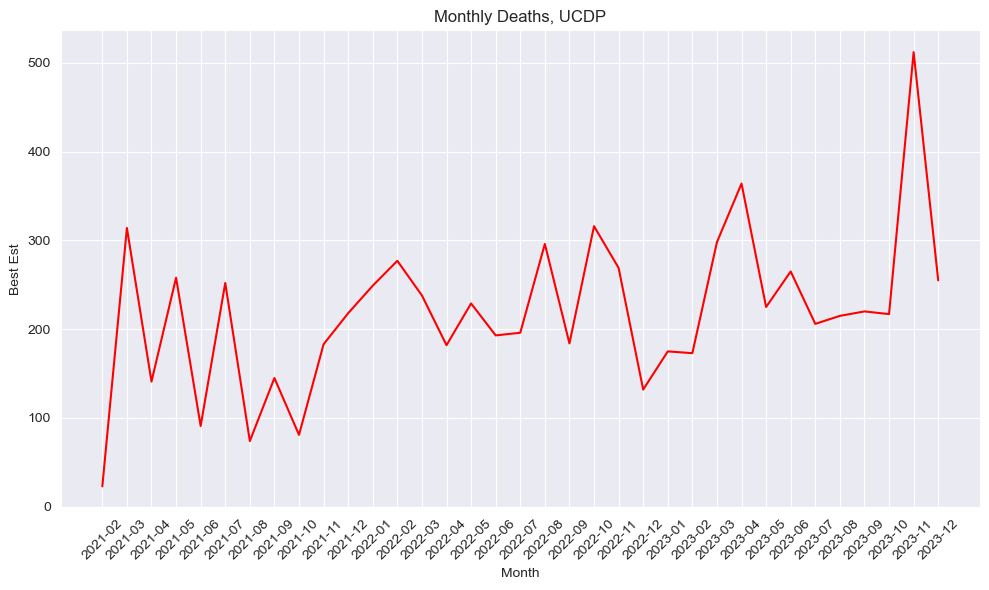

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sum['month_year'], monthly_sum['best_est'], color='red', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Best Est')
plt.title('Monthly Deaths, UCDP')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()